## Home Credit Default Risk

In [7]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Imputer
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier, \
    AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score
import xgboost as xgb

%matplotlib inline

In [8]:
application_test = pd.read_csv("../data/home_credit_default_risk/application_test.csv")
application_train = pd.read_csv("../data/home_credit_default_risk/application_train.csv")
POS_CASH_balance = pd.read_csv("../data/home_credit_default_risk/POS_CASH_balance.csv")
# HomeCredit_columns_description = pd.read_csv("../data/home_credit_default_risk/HomeCredit_columns_description.csv")
bureau = pd.read_csv("../data/home_credit_default_risk/bureau.csv")
bureau_balance = pd.read_csv("../data/home_credit_default_risk/bureau_balance.csv")
credit_card_balance = pd.read_csv("../data/home_credit_default_risk/credit_card_balance.csv")
installments_payments = pd.read_csv("../data/home_credit_default_risk/installments_payments.csv")
previous_application = pd.read_csv("../data/home_credit_default_risk/previous_application.csv")
sample_submission = pd.read_csv("../data/home_credit_default_risk/sample_submission.csv")

In [9]:
# Applications
print(application_train.columns)
application_train.head()

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
print(POS_CASH_balance.columns)
POS_CASH_balance.head()

Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'CNT_INSTALMENT',
       'CNT_INSTALMENT_FUTURE', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF'],
      dtype='object')


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [11]:
POS_CASH_balance[POS_CASH_balance['SK_ID_CURR']==100002]

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
513222,1038818,100002,-13,24.0,18.0,Active,0,0
1216849,1038818,100002,-16,24.0,21.0,Active,0,0
2012884,1038818,100002,-18,24.0,23.0,Active,0,0
5258607,1038818,100002,-17,24.0,22.0,Active,0,0
6543835,1038818,100002,-5,24.0,10.0,Active,0,0
6626366,1038818,100002,-1,24.0,6.0,Active,0,0
7403606,1038818,100002,-14,24.0,19.0,Active,0,0
7601963,1038818,100002,-10,24.0,15.0,Active,0,0
7606684,1038818,100002,-6,24.0,11.0,Active,0,0
7714429,1038818,100002,-4,24.0,9.0,Active,0,0


In [12]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [13]:
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [14]:
credit_card_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [15]:
installments_payments.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [16]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
sample_submission.head()

,SK_ID_CURR,TARGET
0,100001,0.5
1,100005,0.5
2,100013,0.5
3,100028,0.5
4,100038,0.5


In [18]:
print('Size of application_train data', application_train.shape)
print('Size of POS_CASH_balance data', POS_CASH_balance.shape)
print('Size of bureau_balance data', bureau_balance.shape)
print('Size of previous_application data', previous_application.shape)
print('Size of installments_payments data', installments_payments.shape)
print('Size of credit_card_balance data', credit_card_balance.shape)
print('Size of bureau data', bureau.shape)

Size of application_train data (307511, 122)
Size of POS_CASH_balance data (10001358, 8)
Size of bureau_balance data (27299925, 3)
Size of previous_application data (1670214, 37)
Size of installments_payments data (13605401, 8)
Size of credit_card_balance data (3840312, 23)
Size of bureau data (1716428, 17)


### Missing data

In [19]:
# Application
total = application_train.isnull().sum().sort_values(ascending = False)
percent = (application_train.isnull().sum()/application_train.isnull().count()*100).sort_values(ascending = False)
missing_application_train_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_application_train_data.head(20)

,Total,Percent
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MEDI,210199,68.354953
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953


In [20]:
# POS
total = POS_CASH_balance.isnull().sum().sort_values(ascending = False)
percent = (POS_CASH_balance.isnull().sum()/POS_CASH_balance.isnull().count()*100).sort_values(ascending = False)
missing_POS_CASH_balance_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_POS_CASH_balance_data.head(3)

,Total,Percent
CNT_INSTALMENT_FUTURE,26087,0.260835
CNT_INSTALMENT,26071,0.260675
SK_DPD_DEF,0,0.000000


In [21]:
# Bureau balance
total = bureau_balance.isnull().sum().sort_values(ascending = False)
percent = (bureau_balance.isnull().sum()/bureau_balance.isnull().count()*100).sort_values(ascending = False)
missing_bureau_balance_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_bureau_balance_data.head(3)

,Total,Percent
STATUS,0,0.0
MONTHS_BALANCE,0,0.0
SK_ID_BUREAU,0,0.0


In [22]:
# Previous application
total = previous_application.isnull().sum().sort_values(ascending = False)
percent = (previous_application.isnull().sum()/previous_application.isnull().count()*100).sort_values(ascending = False)
missing_previous_application_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_previous_application_data.head(15)

,Total,Percent
RATE_INTEREST_PRIVILEGED,1664263,99.643698
RATE_INTEREST_PRIMARY,1664263,99.643698
RATE_DOWN_PAYMENT,895844,53.636480
AMT_DOWN_PAYMENT,895844,53.636480
NAME_TYPE_SUITE,820405,49.119754
DAYS_TERMINATION,673065,40.298129
NFLAG_INSURED_ON_APPROVAL,673065,40.298129
DAYS_FIRST_DRAWING,673065,40.298129
DAYS_FIRST_DUE,673065,40.298129
DAYS_LAST_DUE_1ST_VERSION,673065,40.298129


In [23]:
# Installment payments
total = installments_payments.isnull().sum().sort_values(ascending = False)
percent = (installments_payments.isnull().sum()/installments_payments.isnull().count()*100).sort_values(ascending = False)
missing_installments_payments_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_installments_payments_data.head(3)

,Total,Percent
AMT_PAYMENT,2905,0.021352
DAYS_ENTRY_PAYMENT,2905,0.021352
AMT_INSTALMENT,0,0.000000


In [24]:
# Card balance
total = credit_card_balance.isnull().sum().sort_values(ascending = False)
percent = (credit_card_balance.isnull().sum()/credit_card_balance.isnull().count()*100).sort_values(ascending = False)
missing_credit_card_balance_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_credit_card_balance_data.head(10)

,Total,Percent
AMT_PAYMENT_CURRENT,767988,19.998063
AMT_DRAWINGS_OTHER_CURRENT,749816,19.524872
CNT_DRAWINGS_POS_CURRENT,749816,19.524872
CNT_DRAWINGS_OTHER_CURRENT,749816,19.524872
CNT_DRAWINGS_ATM_CURRENT,749816,19.524872
AMT_DRAWINGS_ATM_CURRENT,749816,19.524872
AMT_DRAWINGS_POS_CURRENT,749816,19.524872
CNT_INSTALMENT_MATURE_CUM,305236,7.948208
AMT_INST_MIN_REGULARITY,305236,7.948208
SK_DPD_DEF,0,0.000000


In [25]:
# Bureau
total = bureau.isnull().sum().sort_values(ascending = False)
percent = (bureau.isnull().sum()/bureau.isnull().count()*100).sort_values(ascending = False)
missing_bureau_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_bureau_data.head(8)

,Total,Percent
AMT_ANNUITY,1226791,71.473490
AMT_CREDIT_MAX_OVERDUE,1124488,65.513264
DAYS_ENDDATE_FACT,633653,36.916958
AMT_CREDIT_SUM_LIMIT,591780,34.477415
AMT_CREDIT_SUM_DEBT,257669,15.011932
DAYS_CREDIT_ENDDATE,105553,6.149573
AMT_CREDIT_SUM,13,0.000757
CREDIT_TYPE,0,0.000000


(0.0, 1.0, 0.0, 1.0)

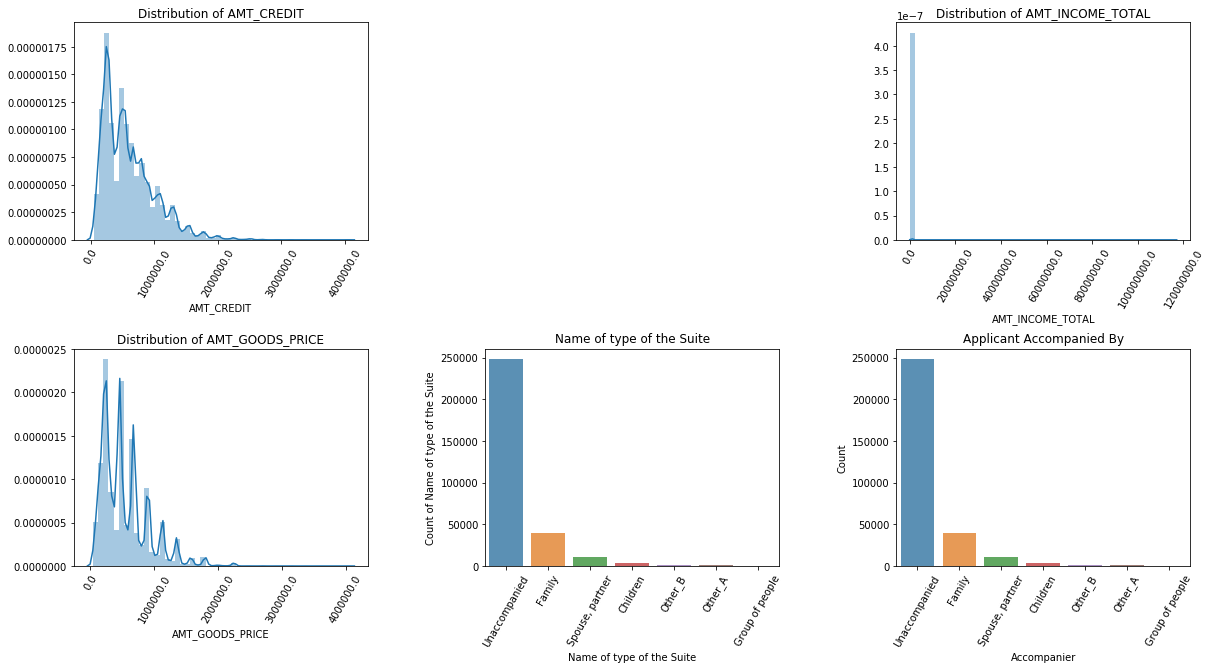

In [247]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20,10), sharex=False, sharey=False)
plt.subplots_adjust(wspace = 0.4, hspace = 0.5)

ax[0,0].set_title("Distribution of AMT_CREDIT")
g00 = sns.distplot(application_train["AMT_CREDIT"], ax=ax[0,0])
g00.set_xticklabels(ax[0,0].get_xticks(), rotation=60)

ax[0,2].set_title("Distribution of AMT_INCOME_TOTAL")
g02 = sns.distplot(application_train["AMT_INCOME_TOTAL"].dropna(), ax=ax[0,2])
g02.set_xticklabels(ax[0,2].get_xticks(), rotation=60)

ax[1,0].set_title("Distribution of AMT_GOODS_PRICE")
g10 = sns.distplot(application_train["AMT_GOODS_PRICE"].dropna(), ax=ax[1,0])
g10.set_xticklabels(ax[1,0].get_xticks(), rotation=60)

temp = application_train["NAME_TYPE_SUITE"].value_counts()
ax[1,1].set_title('Name of type of the Suite')
g11 = sns.barplot(temp.index, temp.values, alpha=0.8, ax=ax[1,1])
g11.set_xticklabels(g11.get_xticklabels(), rotation=60)
ax[1,1].set(xlabel='Name of type of the Suite', ylabel='Count of Name of type of the Suite')

temp = application_train["NAME_TYPE_SUITE"].value_counts()
ax[1,2].set_title('Applicant Accompanied By')
g12 = sns.barplot(temp.index, temp.values, alpha=0.8, ax=ax[1,2])
g12.set_xticklabels(g12.get_xticklabels(), rotation=60)
ax[1,2].set(xlabel='Accompanier', ylabel='Count')

ax[0, 1].axis('off')

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
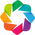

(0.0, 1.0, 0.0, 1.0)

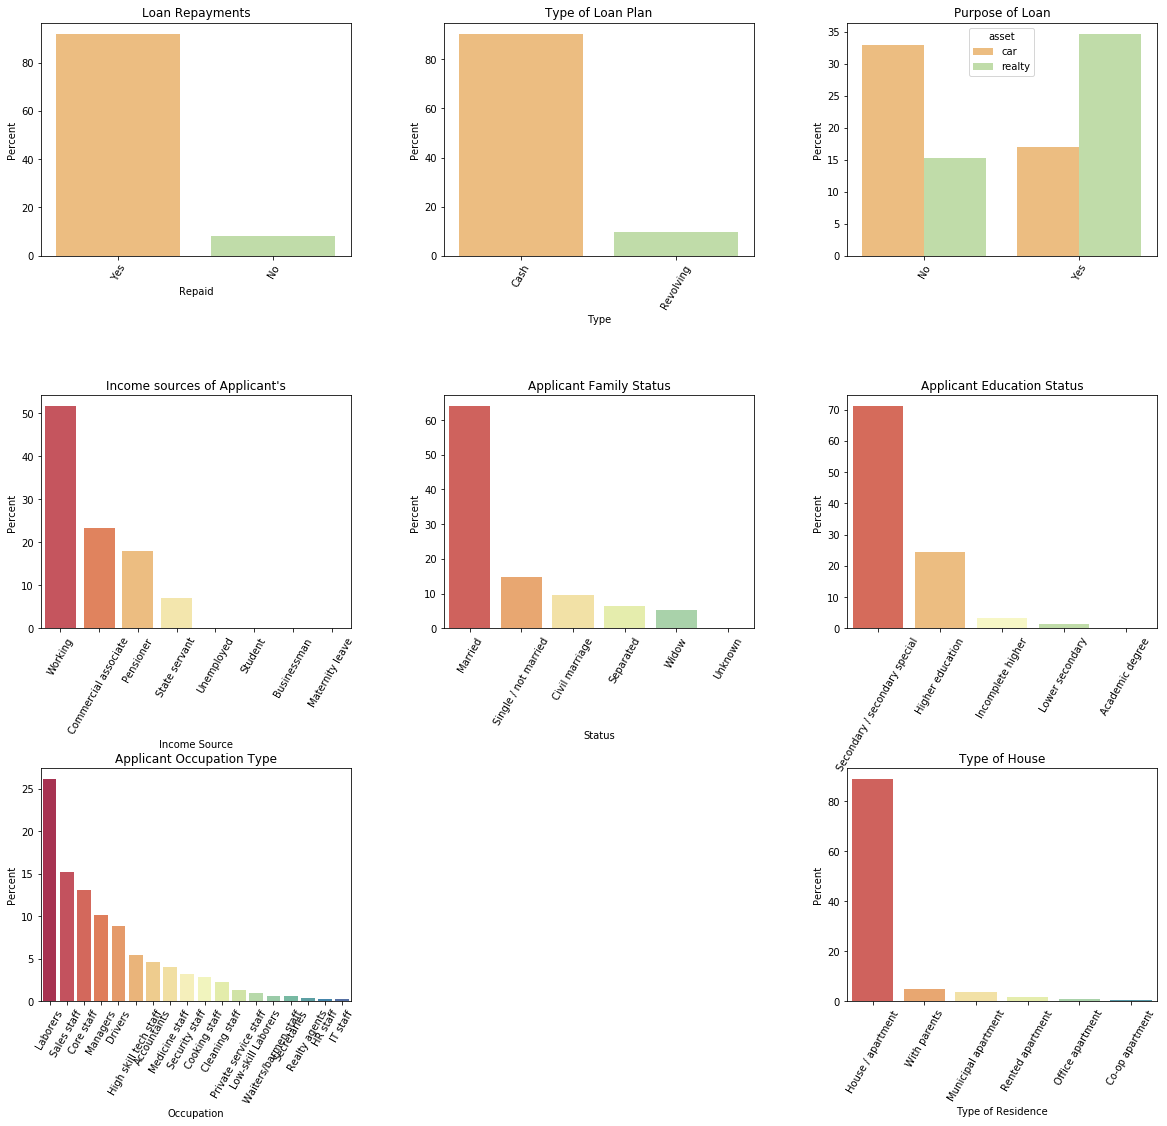

In [251]:
from bokeh.io import show, output_notebook
from bokeh.models import (
    ColumnDataSource,
    HoverTool,
    LinearColorMapper,
    BasicTicker,
    PrintfTickFormatter,
    ColorBar,
    FactorRange,
    Row
)
from bokeh.plotting import figure
from bokeh.palettes import Spectral
import holoviews as hv #There is a reason we have to do this here but its not important. Holoviews is the next library
hv.extension('bokeh')

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20,18), sharex=False, sharey=False)
plt.subplots_adjust(wspace = 0.3, hspace = 0.6)

temp = application_train["TARGET"].value_counts()
temp_df = pd.DataFrame({'labels': ['Yes', 'No'], 'values': temp.values})
temp_df['values'] = 100*temp_df['values']/temp_df.cumsum().values[-1][-1]
ax[0,0].set_title('Loan Repayments')
g10 = sns.barplot(x='labels',y='values', data=temp_df, palette='Spectral', ax=ax[0,0])
g10.set_xticklabels(g10.get_xticklabels(), rotation=60)
ax[0,0].set(xlabel='Repaid', ylabel='Percent')

temp = application_train["NAME_CONTRACT_TYPE"].value_counts()
temp_df = pd.DataFrame({'labels': ['Cash', 'Revolving'], 'values': temp.values})
temp_df['values'] = 100*temp_df['values']/temp_df.cumsum().values[-1][-1]
ax[0,1].set_title('Type of Loan Plan')
g01 = sns.barplot(x='labels',y='values', data=temp_df, palette='Spectral', ax=ax[0,1])
g01.set_xticklabels(g01.get_xticklabels(), rotation=60)
ax[0,1].set(xlabel='Type', ylabel='Percent')

own_car = application_train["FLAG_OWN_CAR"].value_counts()
own_realty = application_train["FLAG_OWN_REALTY"].value_counts()
temp_df = pd.concat((pd.DataFrame({'asset':'car', 'labels': ['No', 'Yes'], 'values': own_car.values}),
                     pd.DataFrame({'asset':'realty', 'labels': ['Yes', 'No'], 'values': own_realty.values})))
temp_df['values'] = 100*temp_df['values']/temp_df.cumsum().values[-1][-1]
ax[0,2].set_title('Purpose of Loan')
g12 = sns.barplot(x='labels',y='values', data=temp_df, palette='Spectral', hue='asset', ax=ax[0,2])
g12.set_xticklabels(g12.get_xticklabels(), rotation=60)
ax[0,2].set(xlabel='', ylabel='Percent')

temp = application_train["NAME_INCOME_TYPE"].value_counts()
temp_df = pd.DataFrame({'labels': temp.index,'values': temp.values})
temp_df['values'] = 100*temp_df['values']/temp_df.cumsum().values[-1][-1]
ax[1,0].set_title('Income sources of Applicants')
g10 = sns.barplot(x='labels',y='values', data=temp_df, palette='Spectral', ax=ax[1,0])
g10.set_xticklabels(g10.get_xticklabels(), rotation=60)
ax[1,0].set(xlabel='Income Source', ylabel='Percent')

temp = application_train["NAME_FAMILY_STATUS"].value_counts()
temp_df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
temp_df['values'] = 100*temp_df['values']/temp_df.cumsum().values[-1][-1]
ax[1,1].set_title('Applicant Family Status')
g11 = sns.barplot(x='labels',y='values', data=temp_df, palette='Spectral', ax=ax[1,1])
g11.set_xticklabels(g11.get_xticklabels(), rotation=60)
ax[1,1].set(xlabel='Status', ylabel='Percent')

temp = application_train["NAME_EDUCATION_TYPE"].value_counts()
temp_df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
temp_df['values'] = 100*temp_df['values']/temp_df.cumsum().values[-1][-1]
ax[1,2].set_title('Applicant Education Status')
g12 = sns.barplot(x='labels',y='values', data=temp_df, palette='Spectral', ax=ax[1,2])
g12.set_xticklabels(g12.get_xticklabels(), rotation=60)
ax[1,2].set(xlabel='Education', ylabel='Percent')

temp = application_train["OCCUPATION_TYPE"].value_counts()
temp_df = pd.DataFrame({'Occupation': temp.index,'Count': temp.values})
temp_df['Count'] = 100*temp_df['Count']/temp_df.cumsum().Count[len(temp_df)-1]
ax[2,0].set_title('Applicant Occupation Type')
g20 = sns.barplot(x='Occupation', y='Count', data=temp_df, palette='Spectral', ax=ax[2,0])
g20.set_xticklabels(g20.get_xticklabels(), rotation=60)
ax[2,0].set(xlabel='Occupation', ylabel='Percent')

temp = application_train["NAME_HOUSING_TYPE"].value_counts()
temp_df = pd.DataFrame({'labels': temp.index, 'values': temp.values})
temp_df['values'] = 100*temp_df['values']/temp_df.cumsum().values[-1][-1]
ax[2,2].set_title('Type of House')
g22 = sns.barplot(x='labels',y='values', data=temp_df, palette='Spectral', ax=ax[2,2])
g22.set_xticklabels(g22.get_xticklabels(), rotation=60)
ax[2,2].set(xlabel='Type of Residence', ylabel='Percent')

ax[2, 1].axis('off')

[Text(0,0.5,'Percent'), Text(0.5,0,'Organization Name')]

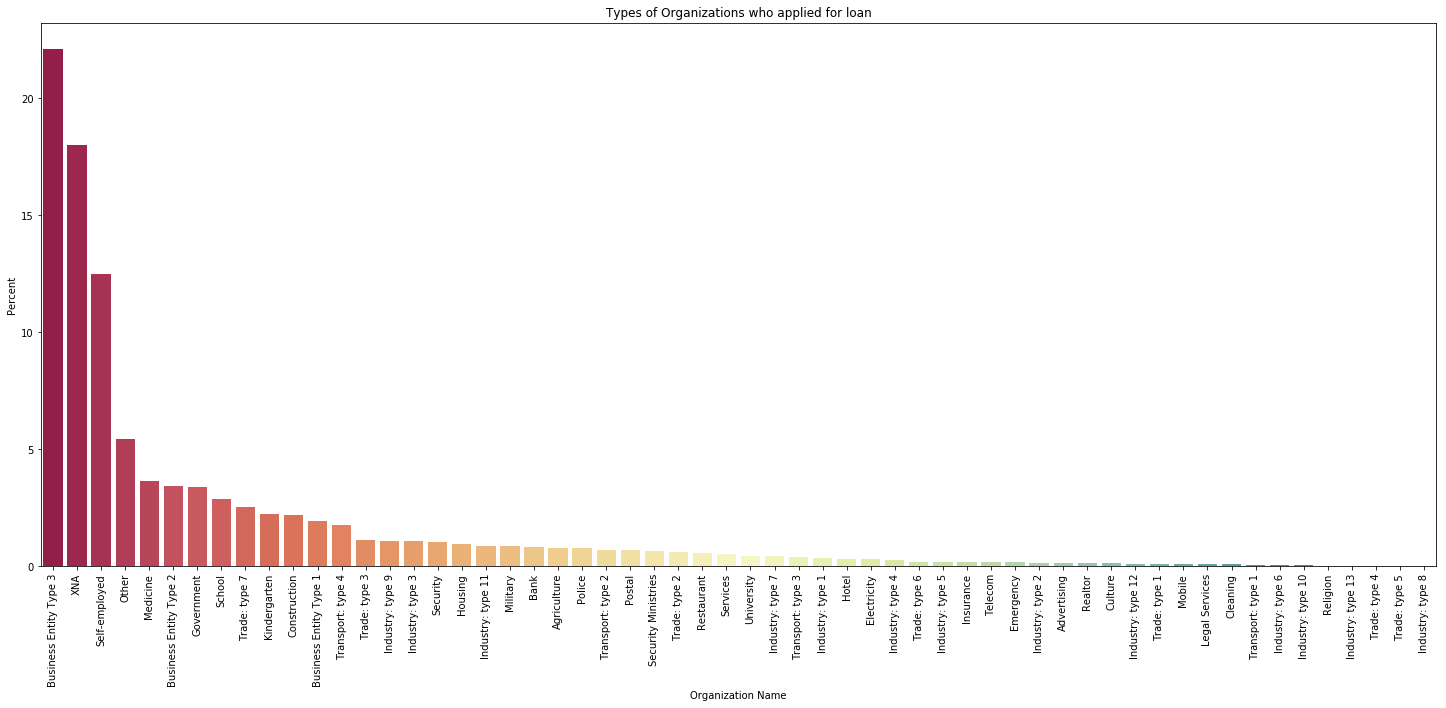

In [254]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(25,10), sharex=False, sharey=False)
plt.subplots_adjust(wspace = 0.2)

temp = application_train["ORGANIZATION_TYPE"].value_counts()
temp_df = pd.DataFrame({'Organization': temp.index,'Count': temp.values})
temp_df['Count'] = 100*temp_df['Count']/temp_df.cumsum().Count[len(temp_df)-1]
ax.set_title('Types of Organizations who applied for loan')
g1 = sns.barplot(x='Organization', y='Count', data=temp_df, palette='Spectral', ax=ax)
g1.set_xticklabels(g1.get_xticklabels(), rotation=90)
ax.set(xlabel='Organization Name', ylabel='Percent')


In [397]:
from typing import Tuple, List, Union
def plot_subplot_by_repayment(prop: str, title: str, x_label: 
                              str, ind: int, x_rot: int=30, 
                              nrows: int=6, ncols: int=1):
    
    assert ind < n_rows*n_cols
    pos_y = ind % n_cols
    pos_x = ind // n_cols

    temp = application_train[prop].value_counts()
    temp_y0 = []
    temp_y1 = []
    for val in temp.index:
        temp_y1.append(np.sum(application_train["TARGET"][application_train[prop]==val] == 1))
        temp_y0.append(np.sum(application_train["TARGET"][application_train[prop]==val] == 0))    
    temp_df = pd.concat((pd.DataFrame({'x': temp.keys(), 'y':temp_y1, 'repaid': 'No'}),
                         pd.DataFrame({'x': temp.keys(), 'y':temp_y0, 'repaid': 'Yes'})
                        ))
    temp_df.y = 100*temp_df.y / temp_df.cumsum().y.values[-1]
    ax[pos_x, pos_y].set_title(title)
    g0 = sns.barplot(x='x', y='y', data=temp_df, palette='Spectral', hue='repaid', ax=ax[pos_x, pos_y])
    g0.set_xticklabels(g0.get_xticklabels(), rotation=x_rot)
    ax[pos_x, pos_y].set(xlabel=x_label, ylabel='Percent')

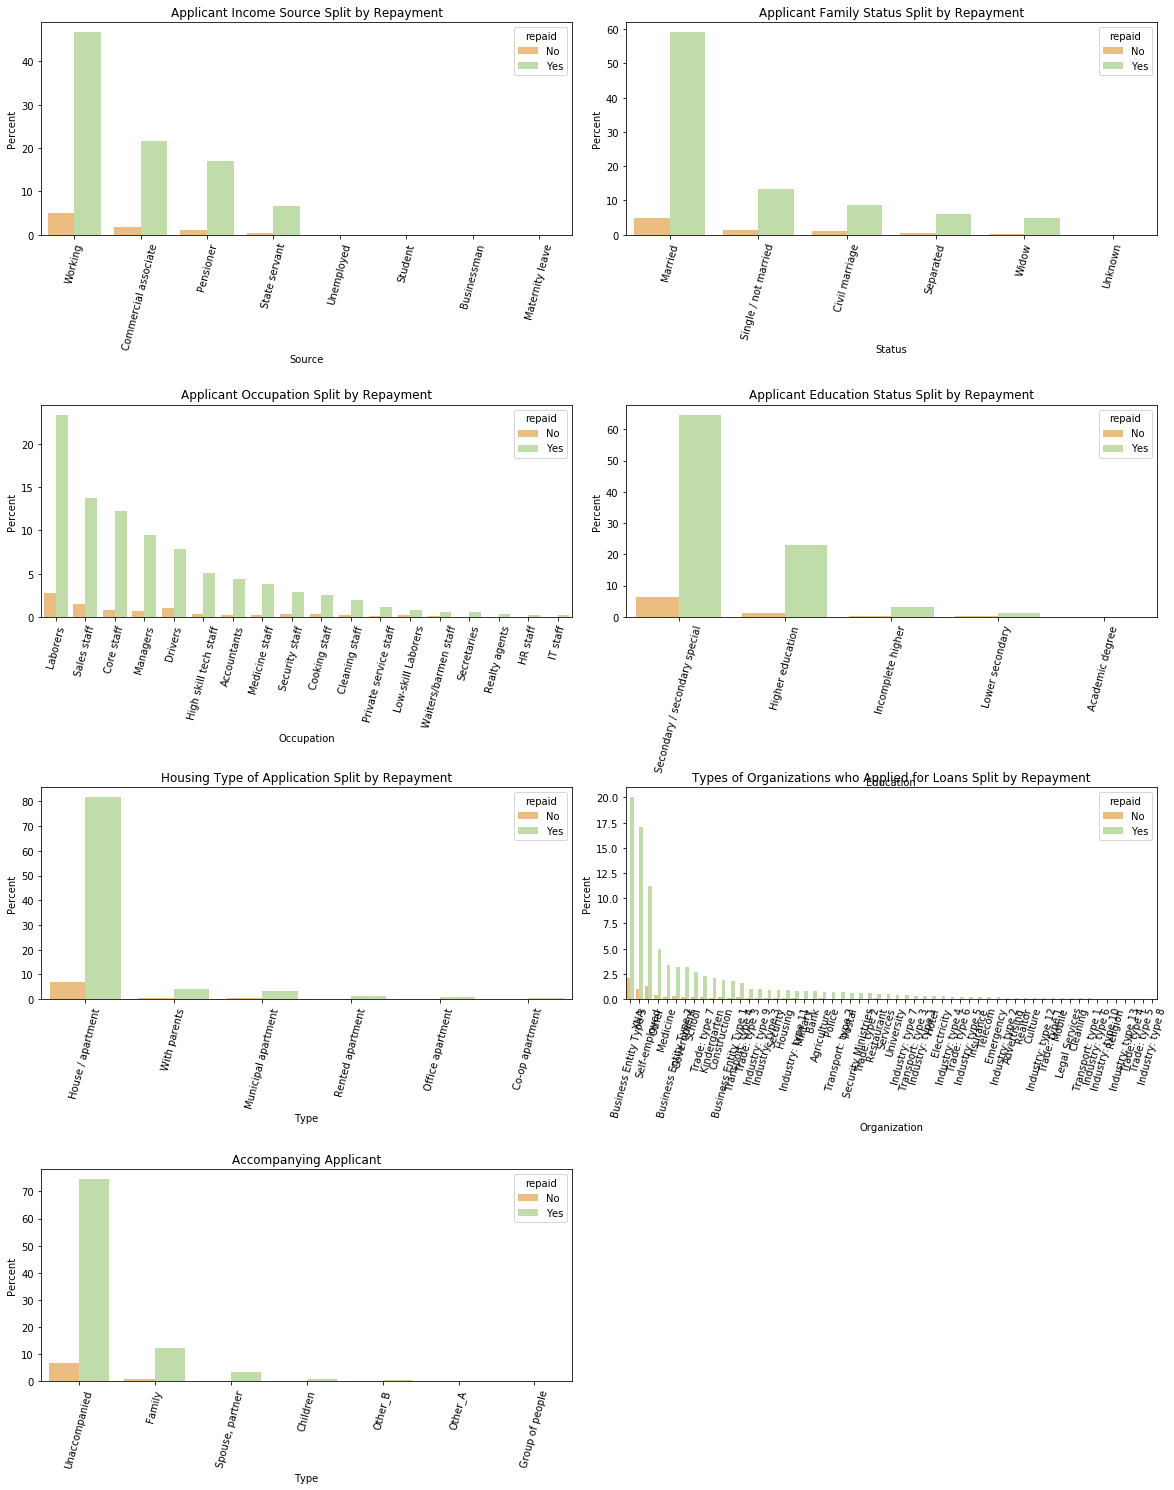

In [406]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(20,25), sharex=False, sharey=False)
plt.subplots_adjust(wspace = 0.1, hspace = 0.8)
ax[3, 1].axis('off')

properties = ('NAME_INCOME_TYPE',
              'NAME_FAMILY_STATUS',
              'OCCUPATION_TYPE',
              'NAME_EDUCATION_TYPE',
              'NAME_HOUSING_TYPE',
              'ORGANIZATION_TYPE',
              'NAME_TYPE_SUITE'
             )
titles = ('Applicant Income Source Split by Repayment',
          'Applicant Family Status Split by Repayment',
          'Applicant Occupation Split by Repayment',
          'Applicant Education Status Split by Repayment',
          'Housing Type of Application Split by Repayment',
          'Types of Organizations who Applied for Loans Split by Repayment',
          'Accompanying Applicant'
         )
labels = ('Source'
          ,'Status',
          'Occupation',
          'Education',
          'Type',
          'Organization',
          'Type'
         )
indices = range(7)

for t, l, i, p in zip(titles, labels, indices, properties):
    plot_subplot_by_repayment(nrows=4, ncols=2,
                              prop=p,
                              title=t,
                              x_label=l,
                              ind=i,
                              x_rot=75
                             )
